In [1]:
# Denetimsiz Öğrenme

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X, y_true = make_blobs(n_samples=300, centers=4, random_state=42)

In [6]:
import matplotlib.pyplot as plt 

In [19]:
# X[:,0] # -> : Tüm satırları al -> [0] 0. sütunu al.

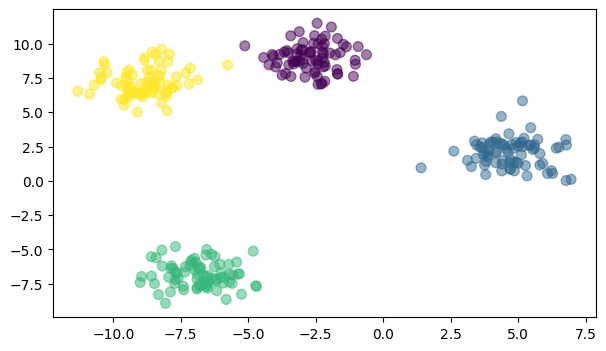

In [21]:
plt.figure(figsize=(7,4))
plt.scatter(X[:,0], X[:,1], c=y_true, s=50, alpha=0.5) 

In [22]:
import pandas as pd

In [32]:
df = pd.read_csv("Mall_Customers.csv")
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [37]:
X = df[ [ "Annual Income (k$)", "Spending Score (1-100)"] ].values #df->arraye çevir

In [33]:
# K-Means

In [41]:
#plt.figure(figsize=(7,4))
#plt.scatter(X[:,0], X[:,1]) 

In [38]:
from sklearn.cluster import KMeans

In [76]:
model = KMeans(n_clusters=5, random_state=42)
model.fit(X)

KMeans(n_clusters=5, random_state=42)

In [77]:
model.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

In [78]:
y = model.predict(X)

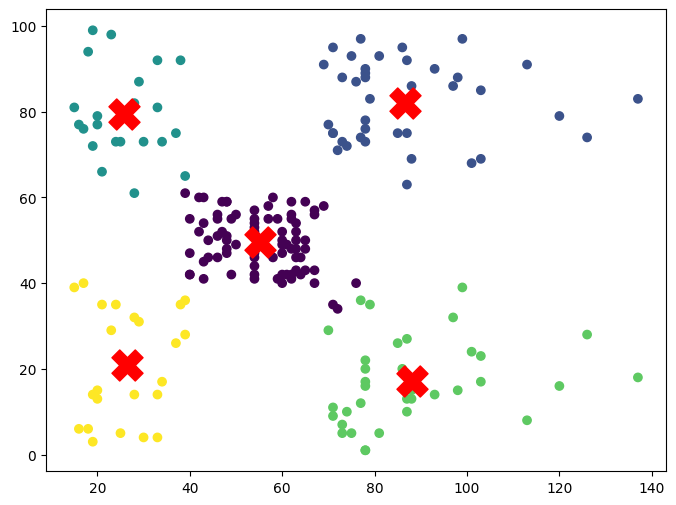

In [79]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1], c=y)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c="red",s=500, marker="X")
plt.show()

#Outlier

In [60]:
# Dirsek (Elbow) Method

In [80]:
# inertia => parametre - her noktanın kendi merkezine uzaklığının karelerinin toplamı.
model.inertia_

44448.45544793371

In [74]:
def elbow_method():
    inertias = []
    for k in range(2,11):
        model = KMeans(n_clusters=k, random_state=42)
        model.fit(X)
        inertias.append(model.inertia_)
    plt.figure(figsize=(8,6))
    plt.plot(range(2,11), inertias)

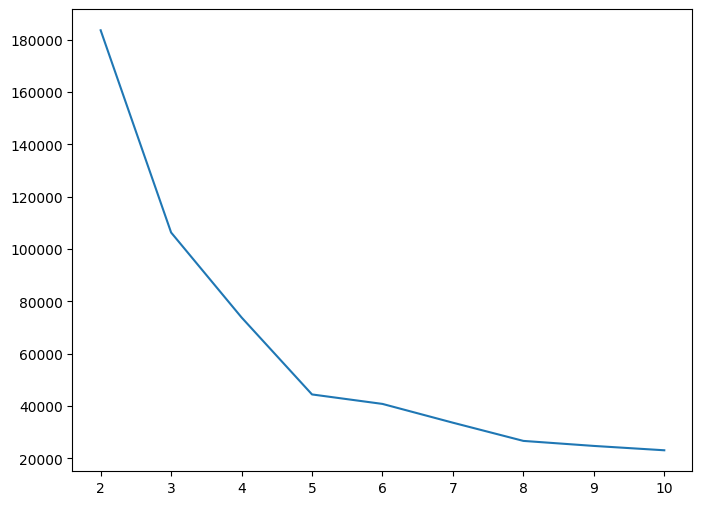

In [75]:
elbow_method()
# dirsek methoduna göre en iyi n_cluster = 5

In [81]:
# Silhouette Method -> Kendi merkezime yakınlık? Diğer merkezlere uzaklık?

In [82]:
from sklearn.metrics import silhouette_score

In [87]:
def silh_method():
    scores = []
    for k in range(2,11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        y = kmeans.fit_predict(X)
        scores.append( silhouette_score(X,y) )
    plt.figure(figsize=(8,6))
    plt.plot(range(2,11), scores)
    plt.show()

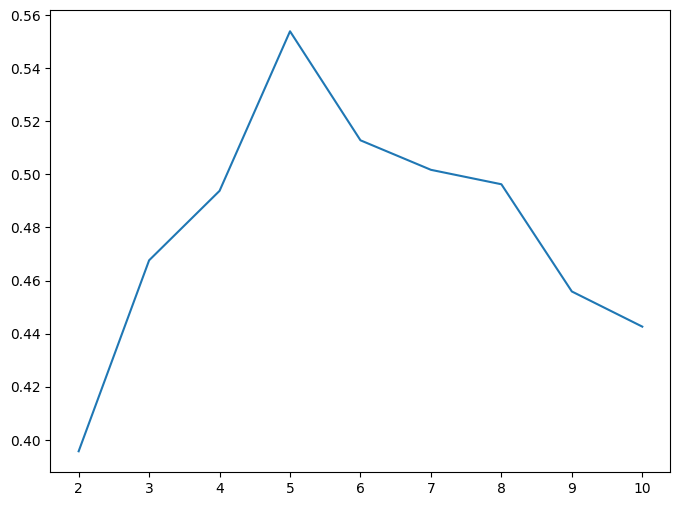

In [88]:
silh_method()

In [89]:
# 1. Ödev => Davies Bouldin Method Araştırılıp Uygulanacak.

In [90]:
# 2. Ödev => Scaling (Özellik Ölçekleme) nedir? Nasıl yapılır? Araştırıp markdown dosyası oluşturalım

In [91]:
# DBSCAN -> Algoritması sonraki ders.